__Compare FWI result with true model for the Overthrust model__

Daniel Köhn 
Kiel, 16/07/2016

__Import Libraries__

In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage.filters import gaussian_filter
import pickle

**Import external colormap**

In [61]:
fp = open('../cmap_cm.pkl', 'rb')
my_cmap = pickle.load(fp)
fp.close()

__FD grid dimensions__

In [62]:
DH = 0.05
NX = 1952
NY = 1392
stage = 11

In [63]:
x_p500_outcrop_pos = 69.779

__Define fonts__

In [64]:
FSize = 15
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 16, 9

__Read FWI result and true model__

In [65]:
#f = open("11_01_2019_s140_fmax_80Hz_gauss_var_sx_1p5_sz_0p5_full_offset/modelTest_vs_stage_" + str(stage) + ".bin")
f = open("../../start/Kleinneudorf_init_s140.vs")
data_type = np.dtype ('float32').newbyteorder ('<')
mod_true = np.fromfile (f, dtype=data_type)
mod_true = mod_true.reshape(NX,NY)
mod_true = np.transpose(mod_true)
mod_true = np.flipud(mod_true)

In [66]:
#f = open("11_01_2019_s140_fmax_80Hz_gauss_var_sx_1p5_sz_0p5_full_offset/modelTest_rho_stage_" + str(stage) + ".bin")
f = open("../../start/Kleinneudorf_init_s140.rho")
data_type = np.dtype ('float32').newbyteorder ('<')
fwi = np.fromfile (f, dtype=data_type)
fwi = fwi.reshape(NX,NY)
fwi = np.transpose(fwi)
fwi = np.flipud(fwi)

__Find minimum values > 0__

In [67]:
EST_MINMAX = 0
if(EST_MINMAX==1):
    
    vsmin = 1e9
    rhomin = 1e9

    for i in range(0,NY-1):
        for j in range(0,NX-1):
        
            if(fwi[i,j]<vsmin and fwi[i,j] > 0.0):
                rhomin = fwi[i,j]
            
    for i in range(0,NY-1):
        for j in range(0,NX-1):
        
            if(mod_true[i,j]<vsmin and mod_true[i,j] > 0.0):
                vsmin = mod_true[i,j]
            
    print("vsmin = ", vsmin)
    print("rhomin = ", rhomin)

print("vsmax = ", np.max(mod_true))
print("rhomax = ", np.max(fwi))

vsmax =  682.644
rhomax =  2075.59


__Wavefield clip value__ 

In [68]:
# parameters from p500 FWI result
#vsmin = 58.0
#vsmax = 910.0
#rhomin = 1450.0
#rhomax = 2640.0

# Parameters from pnorte
#vsmin = 100.0
#vsmax = 710.0
#rhomin = 1550.0
#rhomax = 2380.0

# Parameters from p500 FWI result
vsmin = 43.0
vsmax = 749.0
rhomin = 1550.0
rhomax = 2455.0

__Define Axis__

In [69]:
x = np.arange(0.0, DH*NX, DH)
y = np.arange(0.0, DH*NY, DH)

__Define SubPlot__

In [70]:
def do_plot(n, model, cm, an, an1, title, vpmin, vpmax):
    
    ax=plt.subplot(1, 2, n)
    
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('text', usetex=True)
    
    im1 = plt.imshow(model, cmap=cm, interpolation='none', extent=[0.0,NX*DH,0.0,NY*DH], vmin=vpmin, vmax=vpmax, aspect=1)
    # mark outcrop by arrow
    #arr = plt.arrow(x_p500_outcrop_pos, 0, 0, 2, edgecolor='black', head_width=3, head_length=4)
    
    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    a.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    #a.add_patch(arr)
    #plt.axis('scaled')
    plt.title(title, fontdict=font)
    if n==1:
        plt.ylabel('Depth [m]', fontdict=font)    
    plt.xlabel('Distance [m]', fontdict=font)
    plt.ylim(0, 50)
    plt.gca().invert_yaxis()
    if n==2:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    # add annotation
    # plt.text(4,50,an1,fontdict=font,color='white',size=20)
    
    # fit and label colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2.5%", pad=0.05)
    cbar = plt.colorbar(im1, cax=cax)
    cbar.set_label(an, fontdict=font, labelpad=3)

__Plot SubPlots__

C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


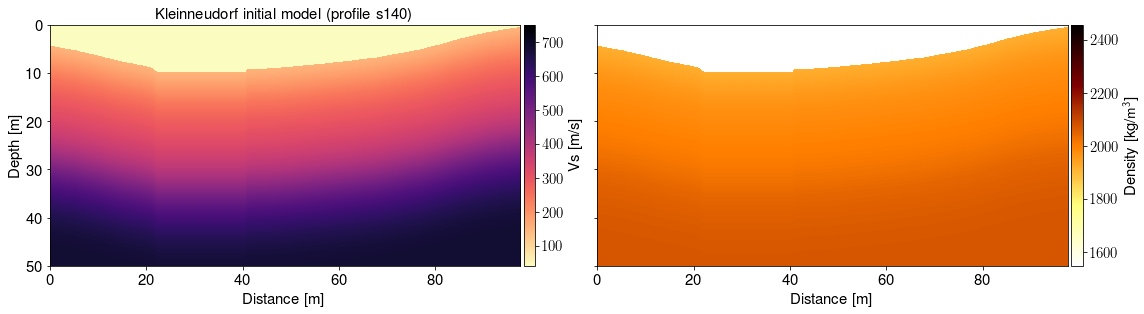

In [71]:
plt.close('all')
plt.figure()

#do_plot(1, mod_true, 'gist_gray_r', 'Vs [m/s]', '(a)', r"Kleinneudorf FWI (profile 500)", vsmin, vsmax)
#do_plot(2, fwi, 'afmhot_r', r'Density [kg/$\bf{\sf{m^3}}$]', '(b)', "", rhomin, rhomax)

do_plot(1, mod_true, 'magma_r', r'Vs [m/s]', '(a)', "Kleinneudorf FWI (profile s140)", vsmin, vsmax)
do_plot(2, fwi, 'afmhot_r', r'Density [kg/$\bf{\sf{m^3}}$]', '(b)', "", rhomin, rhomax)

plt.savefig('stage_' + str(stage) + '.pdf', bbox_inches='tight', format='pdf')
#plt.savefig('stage_' + str(stage) + '.png', bbox_inches='tight', format='png',dpi=100)
plt.tight_layout()
plt.show()